In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style


%matplotlib inline

## Business Questions

Below are the questions I intend to explore:
1. What are the most frequent movie genres? 
2. Who are the most casted actors?
3. What is the distribution of profits for the top 10 most popular movies?

## Data Exploration
First, I will start by invistigating the data to plan data cleaning and wrangling steps.

In [3]:
#loading the data into a dataframe
movies = pd.read_csv('tmdb-movies.csv')

In [4]:
#Printing the first 5 rows of the dataset
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
movies.shape

(10866, 21)

In [6]:
#Get stat of missing data
movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
movies.isnull().sum().sum()

13434

In [8]:
#stats on the number of duplicates
sum(movies.duplicated())

1

## Data cleaning

After exploring the data, I intened on applying the following steps:
1. Dropping unused columns ('id', 'imdb_id','homepage','director','production_companies','budget_adj', 'revenue_adj', 'overview', 'keywords', 'tagline', 'vote_count','vote_average').
2. Convert missing values into NaNs.
3. Dropping NaNs.
4. Convert columns to appropriate data formats.
5. Drop duplicates.

In [9]:
#Dropping unused columns
#Columns to be deleted
col_to_be_deleted = ['id', 'imdb_id','homepage','director','production_companies','budget_adj', 'revenue_adj', 'overview', 'keywords', 'tagline', 'vote_count','vote_average']

#Dropping the columns from the movies dataset
movies.drop(col_to_be_deleted, axis=1, inplace=True)

In [10]:
movies.head()

,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2015


In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
release_year      10866 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 764.1+ KB


In [12]:
movies.shape

(10866, 9)

In [13]:
#Dealing with missing or unknown values
movies.isnull().sum().sum()

99

In [14]:
# Converting 0 to NaN for budget and revenue
columns = ['budget', 'revenue']
# Replace 0 with NAN
movies[columns] = movies[columns].replace(0, np.NaN)
# Drop rows which contains NAN
movies.dropna(inplace = True)

In [15]:
movies.shape

(3851, 9)

In [16]:
movies.isnull().sum().sum()

0

In [17]:
#After dropping NaNs, we have less than half the number of rows left
#Dropping the duplicates rows
movies.drop_duplicates(keep = 'first', inplace = True)

In [18]:
movies.shape

(3850, 9)

In [19]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 9 columns):
popularity        3850 non-null float64
budget            3850 non-null float64
revenue           3850 non-null float64
original_title    3850 non-null object
cast              3850 non-null object
runtime           3850 non-null int64
genres            3850 non-null object
release_date      3850 non-null object
release_year      3850 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 300.8+ KB


In [20]:
#Converting columns to appropriate data formats

#Convert release_date to datetime
movies.release_date = pd.to_datetime(movies['release_date'])

#Convert budget and revenue to int
col = ['budget', 'revenue']
movies[col] = movies[col].applymap(np.int64)

movies.dtypes

popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

## Answering Business Questions

### Question 1: What are the top genres based on movie popularity?

In [21]:
#Creating a list of gernres  
genres = []

for val in movies['genres']:
    try:
        genres.extend(val.split('|'))
    except AttributeError:
        pass

genres = set(genres)
len(genres)

20

In [22]:
genres

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [23]:
def split_genres(val):
    try:
        if val.find(g) > -1:
            return 1
        else:
            return 0
    except AttributeError:
        return 0

In [24]:
for g in genres:
    movies[g] = movies['genres'].apply(split_genres)

In [25]:
movies.head()

,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,release_year,Music,...,TV Movie,Adventure,Comedy,History,Drama,Documentary,Science Fiction,War,Horror,Mystery
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,0,...,0,1,0,0,0,0,1,0,0,0
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,0,...,0,1,0,0,0,0,1,0,0,0
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,0,...,0,1,0,0,0,0,1,0,0,0
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,0,...,0,1,0,0,0,0,1,0,0,0
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
rows = movies.iloc[:, 9:29]
top_genres = rows.apply(pd.value_counts)

In [27]:
top_genres

,Music,Crime,Romance,Thriller,Western,Animation,Foreign,Fantasy,Family,Action,TV Movie,Adventure,Comedy,History,Drama,Documentary,Science Fiction,War,Horror,Mystery
0,3716,3199,3183,2647,3798,3649,3837,3454,3425,2765,3849,3101,2492,3721,2096,3819,3331,3731,3387,3506
1,134,651,667,1203,52,201,13,396,425,1085,1,749,1358,129,1754,31,519,119,463,344


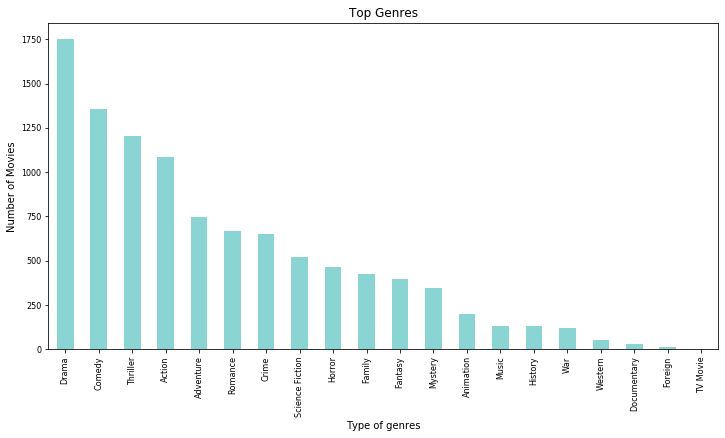

In [28]:
# Initialize the plot
ax = top_genres.iloc[1].sort_values(ascending=False).plot.bar(fontsize = 8, figsize=(12,6), color='#8ad4d4')
# Set a title
ax.set(title = 'Top Genres')
# x-label and y-label
ax.set_xlabel('Type of genres')
ax.set_ylabel('Number of Movies')
# Show the plot
plt.show()


From the analysis above, we can conclude that the most frequent movie genres are Darama, Comedy, Thriller, Action and Adventure.

### Question 2: Who are the most casted actors?

In [29]:
movies.cast[0].split('|')

['Chris Pratt',
 'Bryce Dallas Howard',
 'Irrfan Khan',
 "Vincent D'Onofrio",
 'Nick Robinson']

In [30]:
cast = []
for val in movies['cast']:
    try:
        cast.extend(val.split('|'))
    except AttributeError:
        pass
        

In [31]:
cast = set(cast)
len(cast)

6839

In [32]:
all_cast = pd.Series(movies['cast'].str.cat(sep = '|').split('|')).value_counts(ascending = False)

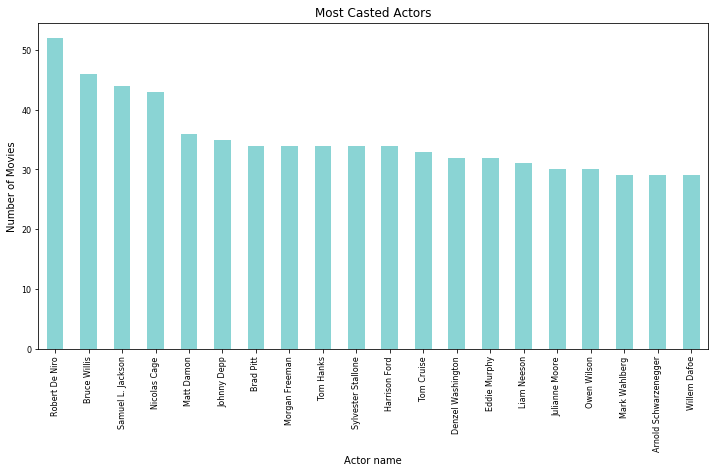

In [33]:
# Initialize the plot
ax = all_cast[:20].plot.bar(fontsize = 8, figsize=(12,6), color='#8ad4d4')
# Set a title
ax.set(title = 'Most Casted Actors')
# x-label and y-label
ax.set_xlabel('Actor name')
ax.set_ylabel('Number of Movies')
# Show the plot
plt.show()

From the analysis above, we can see that the 5 top most casted actors are:Robert De Niro, Bruce Willis, Samuel L. Jackson, Nicolas Cage, and Matt Damon. 

### Question 3: What is the distribution of profits for the top 10 most popular movies?

Exploring the most popular movies:

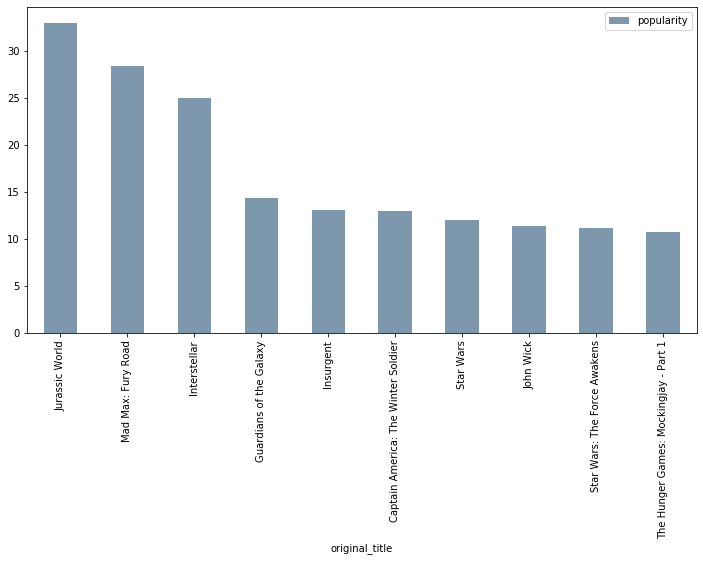

In [34]:
movies.sort_values(ascending=False, by=['popularity'])[:10].plot(kind='bar',x='original_title',y='popularity', figsize=(12,6), color='#7d97ad')

In [42]:
top_movies_revenue = movies[['original_title','revenue', 'budget', 'popularity']].sort_values(ascending=False, by=['popularity'])[:10]

top_movies_revenue[['original_title','revenue', 'budget']].head()

,original_title,revenue,budget
0,Jurassic World,1513528810,150000000
1,Mad Max: Fury Road,378436354,150000000
629,Interstellar,621752480,165000000
630,Guardians of the Galaxy,773312399,170000000
2,Insurgent,295238201,110000000


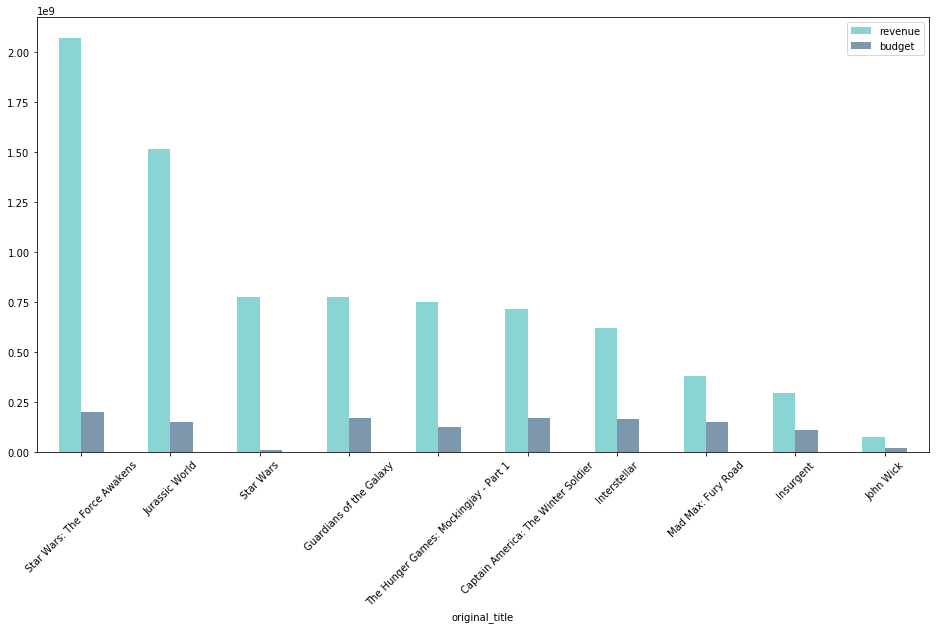

In [40]:
top_movies_revenue[['original_title','revenue', 'budget']].sort_values(ascending=False, by=['revenue']).plot(x='original_title',
                                                      kind='bar', 
                                                      color=["#8ad4d4","#7d97ad"],
                                                      rot=45, figsize=(16,8))